<img src="./images/banner.png" width="800">

# Understanding Data Irregularities: Outliers, Anomalies, Novelties, and Data Drift

In the realm of data science and machine learning, understanding and managing data irregularities is crucial for building robust and reliable models. Data irregularities can significantly impact the performance and reliability of our analyses and predictive models. This lecture explores various types of data irregularities, their characteristics, and their implications for data-driven decision-making.


Data irregularities refer to patterns, observations, or trends in data that deviate from the expected norm or the majority of the dataset. These irregularities can take various forms and occur for different reasons:

1. **Outliers**: Extreme values that significantly differ from other observations.
2. **Anomalies**: Rare instances or patterns that don't conform to expected behavior.
3. **Novelties**: New or previously unseen patterns that emerge in the data.
4. **Data Drift**: Gradual changes in the statistical properties of the target variable over time.


<img src="./images/outliar.jpg" width="600">

🔑 **Key Concept:** Data irregularities are not always errors; they can often provide valuable insights or indicate important events or changes in the underlying process generating the data.


Understanding and properly handling data irregularities is essential for several reasons:

1. **Model Performance**: Irregularities can significantly impact model training and performance.
2. **Data Quality**: They may indicate data quality issues that need addressing.
3. **Business Insights**: Irregularities often highlight important business events or trends.
4. **Risk Management**: In fields like finance or security, irregularities can signal potential risks or fraudulent activities.


Let's briefly introduce the main types of data irregularities we'll be exploring in this lecture:

1. **Outliers**:
   - Definition: Data points that fall far from the general distribution of the dataset.
   - Example: In a dataset of house prices, a mansion priced at $10 million in an area where most houses cost $300,000-$500,000.

2. **Anomalies**:
   - Definition: Patterns or instances that are rare and significantly different from the majority.
   - Example: A sudden spike in network traffic that could indicate a cyber attack.

3. **Novelties**:
   - Definition: New patterns or behaviors that weren't present in the original dataset.
   - Example: A new type of customer behavior emerging after a product update.

4. **Data Drift**:
   - Definition: Gradual changes in the statistical properties of the target variable, which the model is trying to predict, over time.
   - Example: Changing consumer preferences affecting sales patterns over seasons.


💡 **Pro Tip:** When working with real-world datasets, always expect to encounter some form of data irregularity. Developing a systematic approach to identify and handle these irregularities is a crucial skill for any data scientist.


Dealing with data irregularities presents several challenges:

1. **Detection**: Identifying irregularities can be complex, especially in high-dimensional data.
2. **Interpretation**: Understanding the cause and significance of irregularities requires domain knowledge.
3. **Treatment**: Deciding how to handle irregularities (remove, transform, or keep) can significantly impact analysis.
4. **Model Robustness**: Ensuring models perform well in the presence of irregularities is crucial for real-world applications.


🤔 **Why This Matters:** In many real-world scenarios, data irregularities are not just noise to be eliminated but can contain valuable information. For instance, in fraud detection, the anomalies are precisely what we're looking for. Therefore, a nuanced understanding of different types of irregularities and their implications is essential for effective data analysis and model building.


In the following sections, we'll delve deeper into each type of data irregularity, exploring their characteristics, detection methods, and strategies for handling them effectively.

**Table of contents**<a id='toc0_'></a>    
- [Outliers: Definition, Types, and Detection](#toc1_)    
  - [Types of Outliers](#toc1_1_)    
  - [Detecting Outliers](#toc1_2_)    
  - [Impact of Outliers](#toc1_3_)    
  - [Handling Outliers](#toc1_4_)    
- [Anomalies: Characteristics and Identification](#toc2_)    
  - [Identifying Anomalies](#toc2_1_)    
  - [Challenges in Anomaly Detection](#toc2_2_)    
- [Novelties: Recognizing New Patterns](#toc3_)    
  - [Novelties vs. Anomalies](#toc3_1_)    
  - [Detecting Novelties](#toc3_2_)    
  - [Challenges in Novelty Detection](#toc3_3_)    
  - [Handling Novelties](#toc3_4_)    
- [Data Drift: Monitoring and Adapting to Changes](#toc4_)    
  - [Detecting Data Drift](#toc4_1_)    
  - [Challenges in Managing Data Drift](#toc4_2_)    
  - [Strategies for Adapting to Data Drift](#toc4_3_)    
  - [Importance of Monitoring Data Drift](#toc4_4_)    
- [Strategies for Handling Data Irregularities](#toc5_)    
  - [Strategies for Handling Outliers](#toc5_1_)    
  - [Strategies for Handling Anomalies](#toc5_2_)    
  - [Strategies for Handling Novelties](#toc5_3_)    
  - [Strategies for Handling Data Drift](#toc5_4_)    
  - [Challenges and Considerations](#toc5_5_)    
- [Summary](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Outliers: Definition, Types, and Detection](#toc0_)

Outliers are one of the most common and impactful forms of data irregularities. Understanding how to identify and handle outliers is crucial for maintaining the integrity of your data analysis and machine learning models.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n = 500
x = np.random.normal(0, 1, n)
y = 2*x + np.random.normal(0, 1, n)

# Add some outliers
outliers_x = np.random.uniform(-5, 5, 20)
outliers_y = np.random.uniform(-10, 10, 20)

x = np.concatenate([x, outliers_x])
y = np.concatenate([y, outliers_y])

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Calculate z-scores for both x and y
z_scores = np.abs((df - df.mean()) / df.std())

# Define outliers as points with z-score > 3
outliers = (z_scores > 3).any(axis=1)

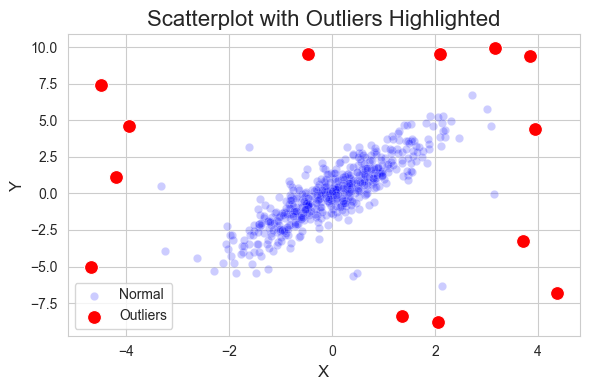

In [44]:
# Create the plot
plt.figure(figsize=(6, 4))

# Plot non-outlier points
sns.scatterplot(data=df[~outliers], x='x', y='y', color='blue', alpha=0.2)

# Plot outlier points in red
sns.scatterplot(data=df[outliers], x='x', y='y', color='red', alpha=1, s=100)

plt.title('Scatterplot with Outliers Highlighted', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend(['Normal', 'Outliers'])

plt.tight_layout()

Outliers are data points that significantly differ from other observations in a dataset. They can be thought of as observations that fall far from the general distribution of the data.


🔑 **Key Concept:** An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.


Mathematically, a common definition for outliers is:

$|x - \mu| > 3\sigma$

Where:
- $x$ is the data point
- $\mu$ is the mean of the distribution
- $\sigma$ is the standard deviation


### <a id='toc1_1_'></a>[Types of Outliers](#toc0_)


Outliers can be categorized into several types based on their nature and origin:


1. **Univariate Outliers**: 
   - Occur in a single variable/feature.
   - Example: In a dataset of human heights, a record showing 3 meters would be a univariate outlier.

2. **Multivariate Outliers**: 
   - Occur in the n-dimensional space created by multiple variables.
   - Example: A combination of age and income that's highly unusual, even if each value isn't an outlier on its own.

3. **Point Outliers**: 
   - Individual data instances that are far from the rest.
   - Example: A single transaction of $1,000,000 in a dataset where most transactions are under $1,000.

4. **Contextual Outliers**: 
   - Data points that are outliers in a specific context but not otherwise.
   - Example: 30°C might be normal in summer but an outlier in winter temperature data.


### <a id='toc1_2_'></a>[Detecting Outliers](#toc0_)


Several methods can be employed to detect outliers:

1. **Statistical Methods**:
   - Z-score: Measures how many standard deviations away a data point is from the mean.
   - IQR (Interquartile Range) Method: Identifies outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

2. **Visualization Techniques**:
   - Box Plots: Graphically depict groups of numerical data through their quartiles.
   - Scatter Plots: Useful for identifying outliers in two-dimensional data.

3. **Machine Learning Methods**:
   - Isolation Forest: Isolates anomalies instead of profiling normal points.
   - Local Outlier Factor (LOF): Compares the local density of a point to its neighbors.


Let's look at a simple example using the Z-score method:


In [20]:
import numpy as np
from scipy import stats


def detect_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]


# Example usage
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]
outliers = detect_outliers(data)
print(f"Outliers found at indices: {outliers}")
print(f"Outliers found at values: {np.array(data)[outliers]}")

Outliers found at indices: [10]
Outliers found at values: [1000]


💡 **Pro Tip:** Always visualize your data before and after outlier detection. This can provide insights into the nature of the outliers and help validate your detection method.


The Local Outlier Factor (LOF) is a more sophisticated method for detecting outliers, particularly effective for identifying local outliers in datasets with varying densities. LOF measures the local deviation of density of a given sample with respect to its neighbors. Points that have a substantially lower density than their neighbors are considered outliers.

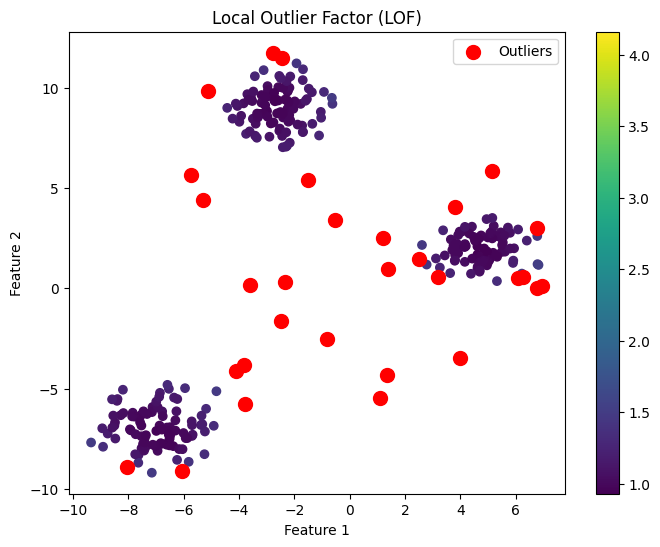

Number of outliers detected: 30


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 300
n_outliers = 15
n_features = 2

X, _ = make_blobs(
    n_samples=n_samples - n_outliers, centers=3, n_features=n_features, random_state=42
)

# Generate outliers
rng = np.random.RandomState(42)
X = np.concatenate(
    [X, rng.uniform(low=-6, high=6, size=(n_outliers, n_features))], axis=0
)

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred != 1

# Calculate LOF scores
lof_scores = -clf.negative_outlier_factor_

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=lof_scores, cmap="viridis")
plt.colorbar(scatter)
plt.title("Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Highlight the outliers
plt.scatter(
    X[y_pred_outliers, 0], X[y_pred_outliers, 1], color="red", s=100, label="Outliers"
)
plt.legend()
plt.show()

# Print number of outliers detected
print(f"Number of outliers detected: {np.sum(y_pred_outliers)}")

The Local Outlier Factor (LOF) is another algorithm used for anomaly detection, but it works differently from the Isolation Forest. LOF is based on the concept of local density, where outliers are data points that have a substantially lower density than their neighbors. Here's how it works:

1. Neighborhood Definition:
   For each data point, the algorithm identifies its k-nearest neighbors (k is a parameter you choose).

2. Local Density Calculation:
   The algorithm calculates the local density for each point. This is done by measuring how far the point is from its neighbors.

3. LOF Score:
   The LOF score for a point is calculated by comparing its density to the densities of its neighbors. 

4. Outlier Identification:
   Points with high LOF scores (typically above 1) are considered potential outliers.


This code does the following:

1. Generates a sample dataset with three clusters and adds some random outliers.
2. Applies the LOF algorithm to detect outliers.
3. Visualizes the results, with points colored according to their LOF score and detected outliers highlighted in red.

💡 **Pro Tip:** The `contamination` parameter in LOF represents the expected proportion of outliers in the dataset. Adjust this based on your domain knowledge or try different values to see how it affects the results.

### <a id='toc1_3_'></a>[Impact of Outliers](#toc0_)


Outliers can significantly impact data analysis and machine learning models:

1. **Statistical Measures**: Outliers can skew measures like mean and standard deviation.
2. **Model Performance**: They can lead to poor model fit, especially in regression models.
3. **Data Transformations**: Outliers may necessitate data transformations like log transformation.
4. **Feature Importance**: They can artificially inflate or deflate the importance of certain features.


❗️ **Important Note:** Not all outliers are errors or noise. In some cases, outliers can be the most interesting part of the data, potentially indicating fraud, rare events, or new trends.


### <a id='toc1_4_'></a>[Handling Outliers](#toc0_)


The approach to handling outliers depends on the nature of the data and the goals of the analysis:

1. **Remove**: If the outlier is due to an error, it may be appropriate to remove it.
2. **Transform**: Apply transformations like log or Box-Cox to reduce the impact of extreme values.
3. **Treat Separately**: Analyze outliers separately if they represent important rare events.
4. **Use Robust Methods**: Employ statistical methods that are less sensitive to outliers, like median instead of mean.


🤔 **Why This Matters:** Proper handling of outliers is crucial for building reliable models. Ignoring outliers can lead to models that perform poorly on new data, while over-zealous removal of outliers might eliminate important information from your dataset.


In the next sections, we'll explore other types of data irregularities and how they differ from simple outliers in their characteristics and treatment.

## <a id='toc2_'></a>[Anomalies: Characteristics and Identification](#toc0_)

Anomalies, also known as anomalous data points or events, represent patterns in data that do not conform to expected behavior. While often used interchangeably with outliers, anomalies have distinct characteristics and require specific approaches for identification and handling.


Anomalies are data points or patterns that deviate significantly from the norm or expected behavior in a dataset. Unlike outliers, which are often individual extreme values, anomalies can be more complex patterns or sequences of data.


<img src="./images/anomaly-vs-outlier.png" width="800">

🔑 **Key Concept:** Anomalies are not just extreme values but unexpected patterns that may indicate important events, errors, or opportunities in the data.


Here are some key characteristics of anomalies:
1. **Rarity**: Anomalies are, by definition, rare occurrences in the dataset.
2. **Unexpectedness**: They deviate significantly from the expected pattern or behavior.
3. **Actionability**: Often, anomalies provide valuable insights or require immediate action.
4. **Contextual Nature**: What constitutes an anomaly can depend on the context or domain.


Anomalies can be categorized into several types:
1. **Point Anomalies**: 
   - Individual data instances that are anomalous compared to the rest of the data.
   - Example: A sudden spike in CPU usage on a server.

2. **Contextual Anomalies**: 
   - Data instances that are anomalous in a specific context but not otherwise.
   - Example: A high temperature reading that's normal for summer but anomalous for winter.

3. **Collective Anomalies**: 
   - A collection of related data instances that is anomalous with respect to the entire dataset.
   - Example: A sequence of actions in a computer network that, when viewed together, indicate a cyber attack.


### <a id='toc2_1_'></a>[Identifying Anomalies](#toc0_)


Detecting anomalies often requires more sophisticated techniques than those used for simple outlier detection. Here are some common methods:

1. **Statistical Methods**:
   - Extreme Value Analysis: Identifies data points that deviate from the statistical distribution of the dataset.
   - Regression Model Residuals: Analyzes the residuals from a regression model to identify anomalous points.

2. **Machine Learning Techniques**:
   - Clustering-based Methods: Identify data points that don't belong to any cluster or form very small clusters.
   - Isolation Forest: Isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that feature.
   - One-Class SVM: Learns a decision boundary to classify new data as similar or different to the training set.

3. **Time Series Specific Methods**:
   - Moving Average: Detects anomalies by comparing each point to a moving average.
   - Seasonal Decomposition: Breaks down time series into trend, seasonality, and residuals to identify anomalies.


Let's look at a simple example using the Isolation Forest algorithm:


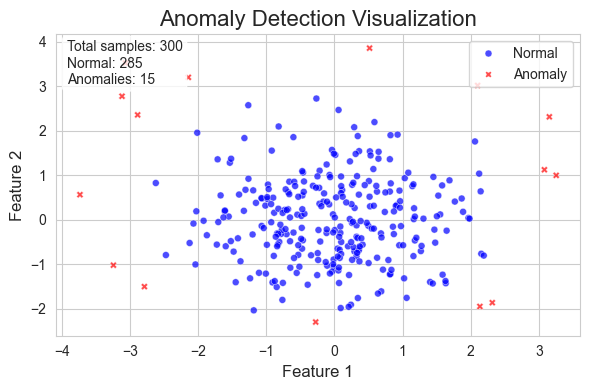

Total samples: 300
Number of normal points: 285
Number of anomalies detected: 15


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Set the style for seaborn
sns.set_style("whitegrid")

# Generate synthetic data
np.random.seed(42)
n_samples = 300
n_outliers = 15
n_inliers = n_samples - n_outliers

# Generate normal data
X = np.random.randn(n_inliers, 2)

# Generate outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outliers, 2))

# Combine normal data and outliers
X = np.r_[X, X_outliers]

# Create a DataFrame
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Detect anomalies using Isolation Forest
clf = IsolationForest(contamination=float(n_outliers) / n_samples, random_state=42)
y_pred = clf.fit_predict(X)

# Add predictions to the DataFrame
df["Anomaly"] = y_pred
df["Anomaly"] = df["Anomaly"].map({1: "Normal", -1: "Anomaly"})

# Create the plot
plt.figure(figsize=(6, 4))

# Use Seaborn's scatterplot
sns.scatterplot(
    data=df,
    x="Feature 1",
    y="Feature 2",
    hue="Anomaly",
    palette={"Normal": "blue", "Anomaly": "red"},
    style="Anomaly",
    s=25,
    alpha=0.7,
)

# Customize the plot
plt.title("Anomaly Detection Visualization", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="", loc="upper right", fontsize=10)

# Add a text box with summary statistics
normal_count = df["Anomaly"].value_counts()["Normal"]
anomaly_count = df["Anomaly"].value_counts()["Anomaly"]
stats_text = (
    f"Total samples: {n_samples}\nNormal: {normal_count}\nAnomalies: {anomaly_count}"
)
plt.text(
    0.02,
    0.98,
    stats_text,
    transform=plt.gca().transAxes,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

# Show the plot
plt.tight_layout()
plt.show()

# Print summary
print(f"Total samples: {n_samples}")
print(f"Number of normal points: {normal_count}")
print(f"Number of anomalies detected: {anomaly_count}")

The Isolation Forest algorithm is a machine learning technique used for anomaly detection. It's based on the idea that anomalies, or unusual data points, are rare and different from normal data points. Here's how it works:

1. Forest Creation:
   Imagine you have a forest of decision trees. Each tree is created differently and randomly.

2. Isolating Data Points:
   For each data point, the algorithm tries to "isolate" it by randomly selecting a feature and a split value. It keeps doing this until the data point is completely isolated.

3. Path Length:
   The algorithm measures how many splits (or steps) it takes to isolate each data point. This is called the "path length."

4. Anomaly Score:
   Data points that are isolated quickly (with shorter path lengths) are more likely to be anomalies. Those that take longer to isolate are probably normal.

5. Average Across Trees:
   This process is repeated across multiple trees, and the average path length for each data point is calculated.

6. Final Decision:
   Data points with consistently short path lengths across many trees are flagged as anomalies.

The key idea is that anomalies are easier to isolate because they have unusual values in one or more features. Normal data points, being more numerous and similar to each other, typically require more splits to isolate.


An analogy might help: Imagine you're playing a game of "Guess Who?" with a twist. Instead of asking specific questions, you randomly flip down character cards. Unusual characters (anomalies) will be identified quickly because they'll be the last ones standing after just a few random flips. Common characters (normal data) will take many more random flips to identify.


This approach is particularly effective because:
- It's fast and scalable to large datasets.
- It works well with high-dimensional data.
- It doesn't make assumptions about the distribution of the data.
- It's not heavily influenced by irrelevant features.

💡 **Pro Tip:** When dealing with time series data, consider using specialized anomaly detection techniques that can account for temporal dependencies and seasonal patterns.


### <a id='toc2_2_'></a>[Challenges in Anomaly Detection](#toc0_)


Anomaly detection, while powerful, comes with its own set of challenges. These challenges can significantly impact the effectiveness and reliability of anomaly detection methods. Understanding these challenges is crucial for data scientists and analysts to develop robust and accurate anomaly detection systems. Some of the key challenges include:

1. **High Dimensionality**: As the number of features increases, it becomes harder to distinguish anomalies from normal data points.
2. **Defining Normal Behavior**: In many real-world scenarios, defining what constitutes "normal" behavior can be challenging.
3. **Evolving Data**: In dynamic environments, what is considered anomalous may change over time.
4. **Rare Events**: Some anomalies are so rare that there may not be enough examples to train traditional supervised learning models.


Anomaly detection plays a crucial role in various domains:
1. **Fraud Detection**: Identifying unusual patterns in financial transactions.
2. **Network Security**: Detecting potential cyber attacks or intrusions.
3. **Healthcare**: Identifying unusual patient symptoms or test results.
4. **Manufacturing**: Detecting faults in production processes or product quality issues.


🤔 **Why This Matters:** Effective anomaly detection can lead to early identification of problems, opportunities, or critical events in various systems. It's not just about finding "weird" data points; it's about uncovering insights that can drive decision-making and action.


❗️ **Important Note:** The choice of anomaly detection method should be guided by the nature of your data, the specific problem you're trying to solve, and the computational resources available.


In the next section, we'll explore novelties, which represent a different kind of data irregularity that focuses on new or previously unseen patterns in the data.

## <a id='toc3_'></a>[Novelties: Recognizing New Patterns](#toc0_)

Novelties represent a unique category of data irregularities that focus on identifying new or previously unseen patterns in data. Unlike outliers or anomalies, which are often viewed as deviations from the norm, novelties can signify emerging trends or evolving behaviors in a system.


Novelties are data patterns or instances that have not been previously observed or accounted for in the existing model or dataset. They represent new, emerging behaviors or characteristics that may become more common over time.


<img src="./images/novelty.png" width="1000">

🔑 **Key Concept:** Novelties are not necessarily errors or anomalies, but rather new patterns that the current model or system hasn't encountered before.


Here are some key characteristics of novelties:
1. **Newness**: Novelties represent patterns that haven't been seen in the training data.
2. **Potential for Recurrence**: Unlike anomalies, novelties may become more frequent over time.
3. **Informative Nature**: Novelties often provide valuable insights about evolving trends or behaviors.
4. **Domain Dependence**: What constitutes a novelty can vary significantly based on the specific domain or application.


### <a id='toc3_1_'></a>[Novelties vs. Anomalies](#toc0_)


It's important to distinguish novelties from anomalies:

| Aspect | Novelties | Anomalies |
|--------|-----------|-----------|
| Nature | New patterns | Deviations from expected patterns |
| Frequency | May increase over time | Generally remain rare |
| Implication | Often indicate evolving trends | Often indicate errors or issues |
| Treatment | May need model updates | May need investigation or removal |


### <a id='toc3_2_'></a>[Detecting Novelties](#toc0_)


Detecting novelties often involves techniques that can identify new patterns or clusters in data. Some common approaches include:

1. **One-Class Classification**:
   - Trains on "normal" data and identifies instances that don't fit this pattern.
   - Example: One-Class SVM

2. **Clustering Techniques**:
   - Identify new clusters or data points that don't fit into existing clusters.
   - Example: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

3. **Adaptive Learning Methods**:
   - Continuously update the model to recognize new patterns.
   - Example: Online learning algorithms

4. **Dimensionality Reduction**:
   - Visualize high-dimensional data to spot new patterns.
   - Example: t-SNE (t-Distributed Stochastic Neighbor Embedding)


Let's look at a simple example using One-Class SVM for novelty detection:


/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


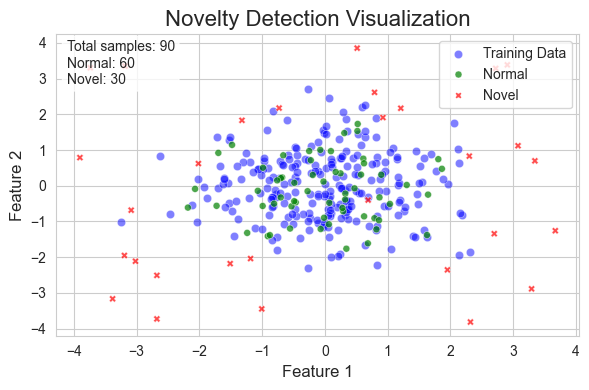

Total samples in test set: 90
Number of normal points detected: 60
Number of novel points detected: 30


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Set the style for seaborn
sns.set_style("whitegrid")

# Generate synthetic data
n_samples = 300
n_features = 2

# Generate normal data
X_normal = np.random.randn(n_samples, n_features)

# Create a DataFrame
df_normal = pd.DataFrame(X_normal, columns=["Feature 1", "Feature 2"])

# Split data into training and testing sets
X_train, X_test = train_test_split(df_normal, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train One-Class SVM
svm = OneClassSVM(kernel="rbf", nu=0.1)
svm.fit(X_train_scaled)

# Generate some novel data
n_novel = 30
X_novel = np.random.uniform(low=-4, high=4, size=(n_novel, n_features))
X_novel_scaled = scaler.transform(X_novel)

# Combine test and novel data
X_combined = np.vstack((X_test_scaled, X_novel_scaled))

# Predict on combined data
y_pred = svm.predict(X_combined)

# Create a DataFrame with combined data and predictions
df_combined = pd.DataFrame(
    scaler.inverse_transform(X_combined), columns=["Feature 1", "Feature 2"]
)
df_combined["Type"] = ["Normal" if pred == 1 else "Novel" for pred in y_pred]

# Visualize the results
plt.figure(figsize=(6, 4))

# Plot training data
sns.scatterplot(
    data=X_train,
    x="Feature 1",
    y="Feature 2",
    color="blue",
    alpha=0.5,
    label="Training Data",
)

# Plot test and novel data
sns.scatterplot(
    data=df_combined,
    x="Feature 1",
    y="Feature 2",
    hue="Type",
    palette={"Normal": "green", "Novel": "red"},
    style="Type",
    s=25,
    alpha=0.7,
)

# Customize the plot
plt.title("Novelty Detection Visualization", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="", loc="upper right", fontsize=10)

# Add a text box with summary statistics
normal_count = df_combined["Type"].value_counts().get("Normal", 0)
novel_count = df_combined["Type"].value_counts().get("Novel", 0)
stats_text = (
    f"Total samples: {len(df_combined)}\nNormal: {normal_count}\nNovel: {novel_count}"
)
plt.text(
    0.02,
    0.98,
    stats_text,
    transform=plt.gca().transAxes,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
)

# Show the plot
plt.tight_layout()
plt.show()

# Print summary
print(f"Total samples in test set: {len(X_test) + n_novel}")
print(f"Number of normal points detected: {normal_count}")
print(f"Number of novel points detected: {novel_count}")

💡 **Pro Tip:** When dealing with high-dimensional data, consider using dimensionality reduction techniques before applying novelty detection algorithms to improve performance and interpretability.


### <a id='toc3_3_'></a>[Challenges in Novelty Detection](#toc0_)


While novelty detection is a powerful tool for identifying new patterns in data, it comes with its own set of challenges. These challenges can impact the effectiveness and reliability of novelty detection algorithms. Understanding these challenges is crucial for data scientists and analysts to implement robust novelty detection systems. Let's explore some of the key challenges faced in novelty detection:

1. **Distinguishing from Noise**: Differentiating between genuine new patterns and random noise can be challenging.
2. **Concept Drift**: The underlying distribution of the data may change over time, making it difficult to distinguish between novelties and evolving normal patterns.
3. **Lack of Labels**: Novelty detection often deals with unlabeled data, making it hard to validate the results.
4. **Computational Complexity**: Some novelty detection algorithms can be computationally expensive, especially for high-dimensional or streaming data.


Novelty detection has various real-world applications:

1. **Recommender Systems**: Identifying new user preferences or emerging product trends.
2. **Industrial Monitoring**: Detecting new types of faults or performance patterns in machinery.
3. **Healthcare**: Recognizing new symptoms or disease patterns.
4. **Financial Markets**: Identifying new trading patterns or market behaviors.


🤔 **Why This Matters:** Effective novelty detection allows systems to adapt to changing environments and identify emerging opportunities or risks. It's crucial for maintaining the relevance and effectiveness of models in dynamic real-world scenarios.


### <a id='toc3_4_'></a>[Handling Novelties](#toc0_)


When novelties are detected, there are several potential courses of action:

1. **Model Update**: Incorporate the new patterns into the existing model through retraining or online learning.
2. **Create New Categories**: If the novelties represent a significant new class, create a new category in the model.
3. **Further Investigation**: Analyze the novelties to understand their cause and implications.
4. **Monitoring**: Keep track of the frequency and nature of novelties to identify emerging trends.


❗️ **Important Note:** The approach to handling novelties should be aligned with the specific goals of your system. In some cases, you may want to quickly adapt to new patterns, while in others, you might need a more cautious approach with human verification.


In the next section, we'll explore the concept of data drift, which represents gradual changes in the statistical properties of the target variable over time, and how it relates to the other types of data irregularities we've discussed.

## <a id='toc4_'></a>[Data Drift: Monitoring and Adapting to Changes](#toc0_)

Data drift represents a fundamental challenge in maintaining the performance and relevance of machine learning models over time. It occurs when the statistical properties of the target variable, which the model is trying to predict, change over time in unforeseen ways.


<img src="./images/data-drift-vs-outliar.png" width="600">

Data drift, also known as concept drift, refers to the phenomenon where the relationships between input and output variables in a dataset change over time, often in unexpected ways. This can lead to a degradation in model performance as the assumptions made during training become less valid.


<img src="./images/data-concept-drift.png" width="600">

🔑 **Key Concept:** Data drift occurs when the statistical properties of the target variable change over time, potentially making a previously trained model less accurate or even obsolete.


<img src="./images/data-drift-2.png" width="600">

There are several types of data drift that can occur:
1. **Sudden Drift**:
   - Abrupt changes in the data distribution.
   - Example: A sudden change in consumer behavior due to a major event.

2. **Gradual Drift**:
   - Slow, progressive changes over time.
   - Example: Gradual shifts in climate data over years.

3. **Recurring Drift**:
   - Previously seen patterns that reappear after some time.
   - Example: Seasonal trends in retail sales.

4. **Incremental Drift**:
   - Small, incremental changes that accumulate over time.
   - Example: Gradual changes in language usage in social media.


### <a id='toc4_1_'></a>[Detecting Data Drift](#toc0_)


Detecting data drift involves monitoring the statistical properties of your data over time. Some common methods include:


1. **Statistical Tests**:
   - Kolmogorov-Smirnov test: Compares the distributions of two datasets.
   - Chi-squared test: For categorical variables, compares observed frequencies with expected frequencies.

2. **Distribution Monitoring**:
   - Tracking changes in mean, variance, or other statistical moments over time.
   - Monitoring changes in feature importance or correlation structures.

3. **Model Performance Metrics**:
   - Regularly evaluating model performance on new data.
   - Monitoring prediction confidence or error rates over time.

4. **Dimensionality Reduction Techniques**:
   - Using PCA or t-SNE to visualize high-dimensional data and track changes over time.


Let's look at a simple example of detecting data drift using the Kolmogorov-Smirnov test:


In [1]:
from scipy import stats
import numpy as np

def detect_drift(data1, data2, threshold=0.05):
    statistic, p_value = stats.ks_2samp(data1, data2)
    if p_value < threshold:
        print(f"Data drift detected (p-value: {p_value})")
    else:
        print(f"No significant drift detected (p-value: {p_value})")

# Example usage
data1 = np.random.normal(0, 1, 1000)  # Original distribution
data2 = np.random.normal(0.5, 1, 1000)  # Shifted distribution

detect_drift(data1, data2)

Data drift detected (p-value: 8.470621055424192e-24)


💡 **Pro Tip:** Implement automated drift detection in your model deployment pipeline to get early warnings about potential performance degradation.


### <a id='toc4_2_'></a>[Challenges in Managing Data Drift](#toc0_)

There are several challenges to managing data drift:
1. **Distinguishing Drift from Noise**: It can be difficult to differentiate between meaningful drift and random fluctuations.
2. **Handling Multiple Types of Drift**: Different features may experience different types of drift simultaneously.
3. **Balancing Adaptation and Stability**: Deciding when and how to update models without introducing instability.
4. **Data Labeling Lag**: In many real-world scenarios, there's a delay in obtaining ground truth labels, making drift detection more challenging.


### <a id='toc4_3_'></a>[Strategies for Adapting to Data Drift](#toc0_)


1. **Regular Retraining**:
   - Periodically retrain the model on recent data to capture new patterns.

2. **Incremental Learning**:
   - Use algorithms that can learn continuously from new data without forgetting old patterns.

3. **Ensemble Methods**:
   - Maintain an ensemble of models trained on different time windows to capture various data distributions.

4. **Feature Engineering**:
   - Develop robust features that are less susceptible to drift.

5. **Adaptive Learning Rate**:
   - Adjust the learning rate based on the detected level of drift.


### <a id='toc4_4_'></a>[Importance of Monitoring Data Drift](#toc0_)


Effective data drift monitoring and adaptation are crucial for several reasons:

1. **Model Reliability**: Ensures that deployed models remain accurate and reliable over time.
2. **Business Impact**: Helps maintain the business value of ML applications in changing environments.
3. **Resource Optimization**: Allows for targeted model updates, optimizing computational and human resources.
4. **Regulatory Compliance**: In some industries, monitoring for drift may be necessary for regulatory compliance.


🤔 **Why This Matters:** In real-world applications, the environment is often non-stationary. Models that don't adapt to data drift can make increasingly poor decisions, potentially leading to significant business or operational impacts.


To effectively monitor and adapt to data drift, consider the following best practices:
1. **Continuous Monitoring**: Implement automated systems to continuously monitor your data and model performance.
2. **Versioning**: Maintain clear versioning of datasets and models to track changes over time.
3. **Interpretability**: Use interpretable models or techniques to understand the nature of the drift.
4. **Alerting System**: Set up alerts for when drift exceeds certain thresholds.
5. **Domain Expertise**: Involve domain experts in interpreting detected drift and deciding on appropriate actions.


❗️ **Important Note:** The approach to handling data drift should be tailored to your specific use case. In some scenarios, you may need to quickly adapt to changes, while in others, a more conservative approach with human oversight may be appropriate.


By effectively monitoring and adapting to data drift, you can ensure that your machine learning models remain relevant and accurate in dynamic, real-world environments.

## <a id='toc5_'></a>[Strategies for Handling Data Irregularities](#toc0_)

Effectively managing data irregularities is crucial for maintaining the reliability and performance of data analysis and machine learning models. This section explores various strategies for handling outliers, anomalies, novelties, and data drift, providing a comprehensive toolkit for data scientists and analysts. Here's a general approach to handling data irregularities:

1. **Detect**: Identify the presence and nature of irregularities in your dataset.
2. **Analyze**: Understand the cause and potential impact of these irregularities.
3. **Decide**: Choose an appropriate strategy based on the type of irregularity and your specific use case.
4. **Implement**: Apply the chosen strategy and monitor its effects.
5. **Iterate**: Continuously evaluate and refine your approach as needed.


🔑 **Key Concept:** There's no one-size-fits-all solution for handling data irregularities. The best approach depends on the nature of your data, the specific problem you're solving, and the potential impact of the irregularities on your analysis or model.


### <a id='toc5_1_'></a>[Strategies for Handling Outliers](#toc0_)


1. **Removal**:
   - When to use: For clear data errors or when outliers significantly skew the analysis.
   - Method: Remove data points beyond a certain threshold (e.g., 3 standard deviations from the mean).

   ```python
   def remove_outliers(data, threshold=3):
       z_scores = np.abs((data - np.mean(data)) / np.std(data))
       return data[z_scores < threshold]
   ```


2. **Transformation**:
   - When to use: To reduce the impact of outliers without removing data.
   - Methods: Log transformation, Box-Cox transformation, or Winsorization.

   ```python
   def winsorize(data, limits=(0.05, 0.05)):
       return stats.mstats.winsorize(data, limits=limits)
   ```


3. **Capping**:
   - When to use: To limit the effect of extreme values while retaining their presence.
   - Method: Set a maximum and minimum value based on percentiles.


4. **Separate Analysis**:
   - When to use: When outliers represent important but rare events.
   - Method: Analyze outliers separately from the main dataset.


### <a id='toc5_2_'></a>[Strategies for Handling Anomalies](#toc0_)


1. **Investigation and Validation**:
   - When to use: For all detected anomalies to confirm their validity.
   - Method: Manual review or automated cross-referencing with other data sources.


2. **Isolation**:
   - When to use: When anomalies are confirmed but shouldn't be removed.
   - Method: Create separate categories or flags for anomalous data points.


3. **Adaptive Thresholding**:
   - When to use: In dynamic systems where the definition of "normal" may change over time.
   - Method: Continuously update thresholds based on recent data.

   ```python
   def adaptive_threshold(data, window_size=100, n_sigmas=3):
       rolling_mean = data.rolling(window=window_size).mean()
       rolling_std = data.rolling(window=window_size).std()
       return rolling_mean + (n_sigmas * rolling_std)
   ```


4. **Ensemble Methods**:
   - When to use: To improve robustness of anomaly detection.
   - Method: Combine multiple anomaly detection algorithms and use majority voting or weighted averaging.


### <a id='toc5_3_'></a>[Strategies for Handling Novelties](#toc0_)


1. **Incremental Learning**:
   - When to use: In systems where new patterns are expected to emerge over time.
   - Method: Use algorithms that can learn continuously from new data.

   ```python
   from river import linear_model

   model = linear_model.PARegressor()
   for x, y in stream:
       y_pred = model.predict_one(x)
       model = model.learn_one(x, y)
   ```


2. **Model Retraining**:
   - When to use: When significant new patterns are detected.
   - Method: Periodically retrain the model on recent data including novelties.


3. **Novelty Incorporation**:
   - When to use: When novelties represent important new categories or trends.
   - Method: Create new categories or features to represent the novelties.


4. **Adaptive Feature Extraction**:
   - When to use: In high-dimensional data where novelties may be complex patterns.
   - Method: Use adaptive feature extraction techniques to capture evolving patterns.


### <a id='toc5_4_'></a>[Strategies for Handling Data Drift](#toc0_)


1. **Sliding Window**:
   - When to use: For gradual drift in time-series data.
   - Method: Train on a moving window of recent data.

   ```python
   def sliding_window_train(model, X, y, window_size):
       for i in range(len(X) - window_size):
           X_window = X[i:i+window_size]
           y_window = y[i:i+window_size]
           model.fit(X_window, y_window)
   ```

2. **Weighted Samples**:
   - When to use: To give more importance to recent data while retaining some older information.
   - Method: Assign higher weights to more recent samples during training.

3. **Ensemble with Experts**:
   - When to use: When different types of drift may occur.
   - Method: Maintain multiple models trained on different time periods and use the best performing one.

4. **Concept Evolution Tracking**:
   - When to use: In systems with recurring concepts or seasonal patterns.
   - Method: Track and store different "concepts" and switch between them as needed.


💡 **Pro Tip:** Implement a monitoring system that tracks the performance of your chosen strategy over time. This allows you to quickly identify when your current approach is no longer effective and needs to be updated.


### <a id='toc5_5_'></a>[Challenges and Considerations](#toc0_)


1. **Balance**: Strive for a balance between model stability and adaptability.
2. **Interpretability**: Ensure that your handling strategies don't compromise the interpretability of your model or analysis.
3. **Domain Knowledge**: Incorporate domain expertise when deciding how to handle irregularities.
4. **Computational Resources**: Consider the computational cost of your chosen strategies, especially for large-scale or real-time systems.


🤔 **Why This Matters:** Properly handling data irregularities is not just about cleaning data or improving model accuracy. It's about building robust, reliable systems that can operate effectively in complex, changing environments.


❗️ **Important Note:** Always document your strategies for handling data irregularities. This documentation is crucial for model governance, reproducibility, and helping stakeholders understand the decisions made in the data processing pipeline.


By applying these strategies thoughtfully and systematically, you can significantly improve the robustness and reliability of your data analysis and machine learning models in the face of various data irregularities.

## <a id='toc6_'></a>[Summary](#toc0_)

As we conclude our exploration of data irregularities, let's recap the key concepts and strategies we've covered. This summary will help solidify your understanding and provide a quick reference guide for handling various types of data irregularities in your future projects. Here is a summary of the key concepts and strategies:

1. **Types of Data Irregularities**:
   - Outliers: Extreme values that significantly differ from other observations.
   - Anomalies: Rare instances or patterns that don't conform to expected behavior.
   - Novelties: New or previously unseen patterns that emerge in the data.
   - Data Drift: Gradual changes in the statistical properties of the target variable over time.

2. **Detection Methods**:
   - Statistical techniques (e.g., Z-score, IQR)
   - Machine learning algorithms (e.g., Isolation Forest, One-Class SVM)
   - Visualization tools (e.g., box plots, scatter plots)
   - Continuous monitoring systems for data drift

3. **Handling Strategies**:
   - Outliers: Removal, transformation, capping, or separate analysis
   - Anomalies: Investigation, isolation, adaptive thresholding
   - Novelties: Incremental learning, model retraining, novelty incorporation
   - Data Drift: Sliding window approaches, weighted samples, ensemble methods

4. **Best Practices**:
   - Always investigate the root cause of irregularities before deciding on a strategy
   - Consider the impact of your chosen strategy on model interpretability and performance
   - Implement continuous monitoring systems to detect irregularities in real-time
   - Regularly validate and update your handling strategies as the data evolves


🔑 **Key Concept:** There is no one-size-fits-all approach to handling data irregularities. The best strategy depends on your specific use case, the nature of your data, and the requirements of your analysis or model.


When approaching a new dataset or problem:

1. Start with exploratory data analysis to understand the distribution and characteristics of your data.
2. Implement detection methods to identify potential irregularities.
3. Analyze the detected irregularities in the context of your domain knowledge.
4. Choose and apply appropriate handling strategies based on the type of irregularity and your specific goals.
5. Monitor the impact of your chosen strategies on model performance and business outcomes.
6. Iterate and refine your approach as needed.


💡 **Pro Tip:** Develop a systematic workflow for handling data irregularities in your projects. This can include standard detection methods, decision trees for choosing strategies, and templates for documenting your approach.


As the field of machine learning continues to evolve, new challenges and solutions for handling data irregularities are likely to emerge:

- Advancements in unsupervised anomaly detection for high-dimensional data
- Improved techniques for handling concept drift in streaming data
- Integration of causal inference methods to better understand the impact of irregularities
- Development of more robust, self-adapting models that can handle various types of irregularities automatically


Mastering the handling of data irregularities is crucial for building reliable, robust machine learning systems that can perform well in real-world, dynamic environments. It's a key skill that separates novice data scientists from experienced practitioners.


Handling data irregularities is as much an art as it is a science. It requires a blend of technical knowledge, domain expertise, and critical thinking. By understanding the various types of irregularities and the strategies available to handle them, you're well-equipped to tackle complex data challenges and build more effective machine learning solutions.


❗️ **Important Note:** Always approach data irregularities with curiosity and caution. What might initially appear as an error or anomaly could be a crucial insight or the key to unlocking new understanding in your data.


As you apply these concepts in your work, remember that the goal is not just to clean your data, but to extract maximum value and insight from it. Each irregularity is an opportunity to learn something new about your data and the system it represents.